#Clusterização com K-means

K-means: Algoritmo não hierárquico, que tem o objetivo de agrupar os dados em k cluster diferentes

Centróide de um cluster: representa o centro de um cluster e é obtido pelo valor médio dos dados que estão dentro desse cluster

Assim, o algoritmo K-means encontra, iterativamente, o centróide de cada cluster através de uma medida de distância de forma que cada cluster contenha os dados cuja distância entre eles e o centróide seja mínima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Leitura dos dados

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()
# Coluna Annual Income: renda anual em dolares multiplicados por mil

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape
#número de registros - 200 linhas e 5 colunas

(200, 5)

### Verificar dados nulos

In [ ]:
df.isnull().sum()
#soma dos registros nulos

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Informações estatísticas

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gerando gráfico de renda anual versus score do cliente

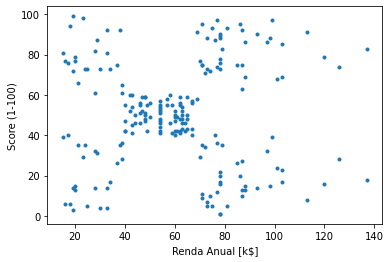

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], marker='.')
plt.xlabel('Renda Anual [k$]')
plt.ylabel('Score (1-100)')
plt.show()

Temos um maior agrupamento de dados em:
- Score: entre 40 e 60
- Renda: entre 40 e 70

### Selecionando dados para agrupamento

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Importando K-means

In [ ]:
from sklearn.cluster import KMeans

### Clusterizando com k = 5

Como encontrar o valor de K?

- Método Elbow (cotovelo): plotar a variância dos dados em função do número de clustes
- Melhor valor para k: a partir do ponto em que os valores de k crescem e os valores de variância não mudam de forma significativa

In [ ]:
modelo_kmeans = KMeans(n_clusters= 5, init='k-means++')
#número de clusters k e tipo de inicialização

In [ ]:
y_kmeans= modelo_kmeans.fit_predict(X)

In [ ]:
print(y_kmeans)
#resultado da clusterização, temos 5 clusters com várias combinações

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 1 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


### Visualizando o primeiro grupo criado

In [ ]:
print(X[y_kmeans == 0])

     Annual Income (k$)  Spending Score (1-100)
123                  69                      91
125                  70                      77
127                  71                      95
129                  71                      75
131                  71                      75
133                  72                      71
135                  73                      88
137                  73                      73
139                  74                      72
141                  75                      93
143                  76                      87
145                  77                      97
147                  77                      74
149                  78                      90
151                  78                      88
153                  78                      76
155                  78                      89
157                  78                      78
159                  78                      73
161                  79                 

#### Visualizando os grupos

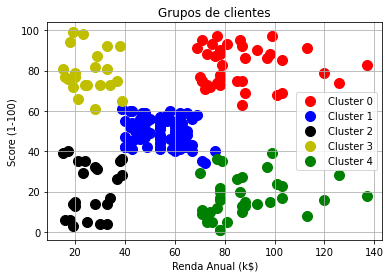

In [ ]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = X[y_kmeans == k]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')


plt.title('Grupos de clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()